In [ ]:
# Imports
import os
import sys
sys.path.append(os.path.abspath(".."))   # one level up
import numpy as np
# print(os.getcwd())
import cv2
import open3d as o3d
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation
from utils.lidar import PointCloud
from utils.camera import ImageData
import utils.utils as utils
from natsort import natsorted

cmap = plt.get_cmap("jet")

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [ ]:
# User parameters
location = 'Cambogan'
sequence = '20250811_113017'
condition = 'flooded'
camera_pos = 'front'
root_directory = f"../../Datasets/FRED/{condition}/KITTI-style"
# 01000000

############ Define filenames and directories ####################################

image_dir = f"{root_directory}/{location}_{sequence}/{camera_pos}-imgs/"
lidar_dir = f"{root_directory}/{location}_{sequence}/ouster/"
utm_dir = f"{root_directory}/{location}_{sequence}/utm/"

img_calib_file = f"../camera_calib.txt"
lidar_calib_file = f"../calib.txt"

timestamps = [filename.split('.png')[0] for filename in natsorted(os.listdir(image_dir)) if os.path.isfile(image_dir+filename)]

# image_timestamp = '20641521'
image_timestamp = timestamps[150]

image_filename = f"{image_dir}/{image_timestamp}.png"

lidar_filename, utm_filename = utils.get_corr_files(image_timestamp, [lidar_dir, utm_dir])

(5935, 2)


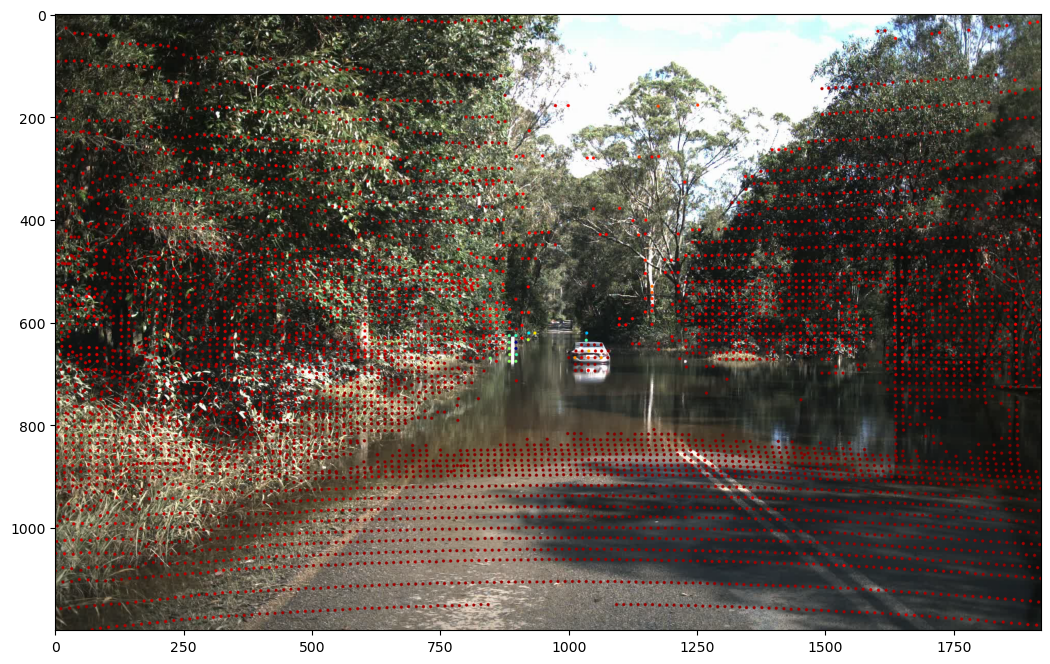

In [ ]:
image = ImageData(image_filename, img_calib_file)
pointcloud = PointCloud(lidar_filename, lidar_calib_file)

point_cam, distances_cam, intensities_cam = pointcloud.points_ouster_to_cam()

img_vis = image.project_points(point_cam, intensities_cam, cmap)

plt.figure(figsize=(12.8,8))
plt.imshow(img_vis[:,:,::-1])
plt.axis('off')
